In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

np.random.seed(42)

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Логистическая регрессия

Проиллюстрируем работу логистической регрессии на игрушечном примере. Сгенерируем двумерный набор точек на плоскости с помощью функции `make_classification`.

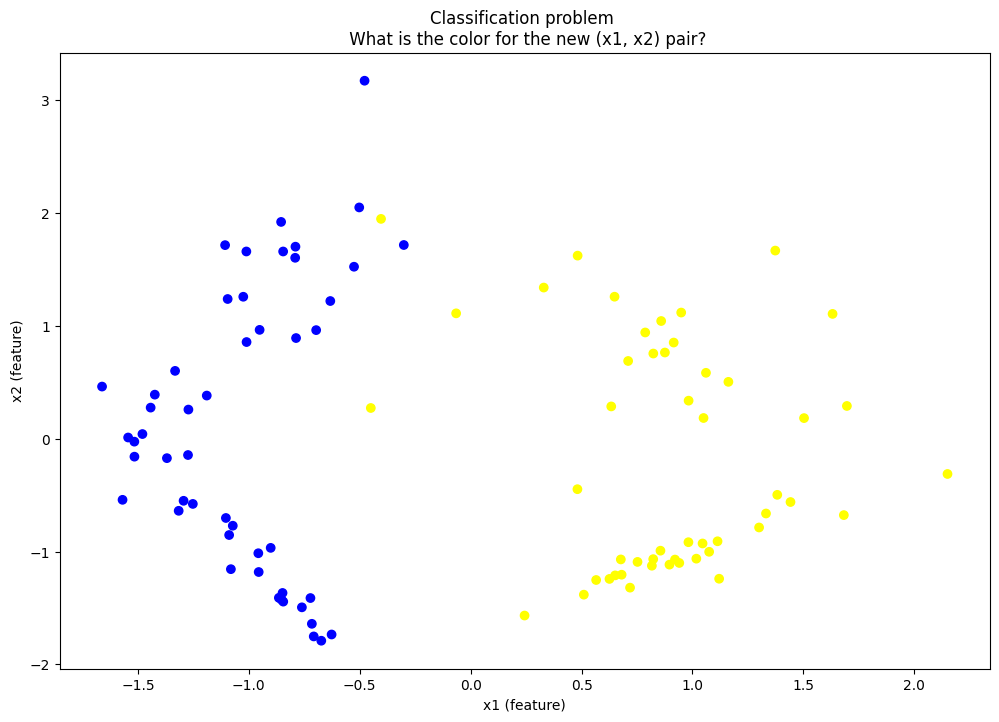

In [3]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=1)

colors = ['yellow' if y_i else 'blue' for y_i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)");

# Линейный классификатор

Построим случайную прямую. Насколько хорошо она описывает данные?

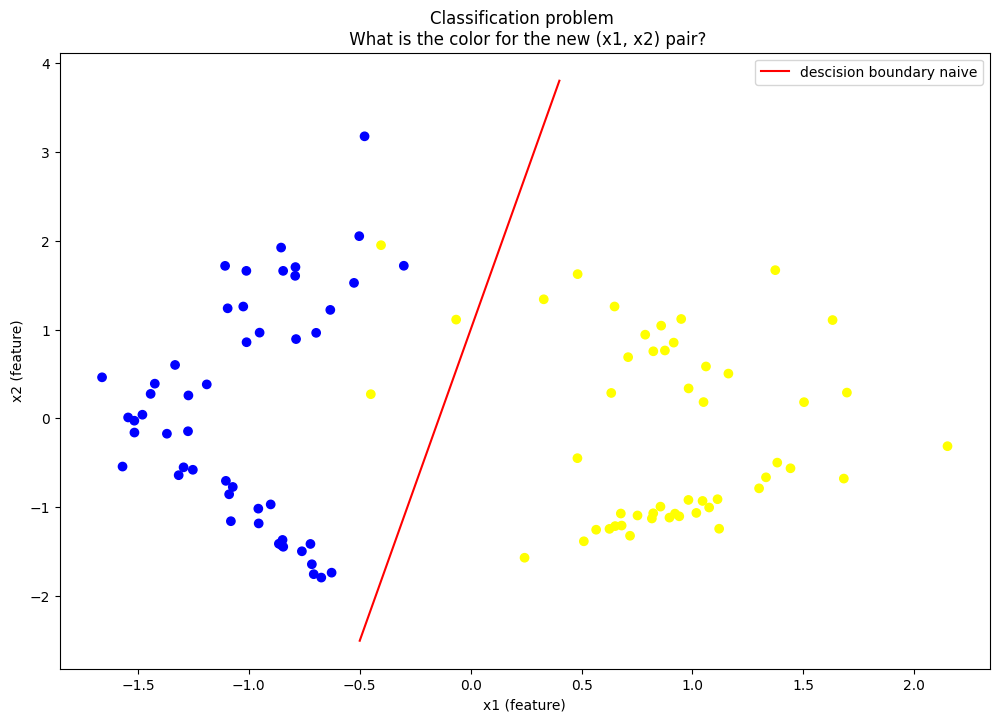

In [4]:
x_naive = np.arange(-0.5, 0.5, 0.1)
y_naive = 7 * x_naive + 1

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend();

## Как принимается решение

Простой вариант узнать, с какой стороны от гиперплоскости находится точка, посмотрев на ее знак относительно этой прямой.

$$\hat{y} = sign(x\theta)$$

In [5]:
w = np.array([7, -1, 1]) # Ax + By + C = 0

# Замечание: расстояние от точки (x0, y0) до прямой Ax + By + C это abs(Ax0 + By0 + C) / sqrt(A^2 + B^2)

def predict(x, w):
    return np.sign(x.dot(w))

x_pred = np.hstack([np.random.rand(10, 2) * 4 - 2, np.ones(10).reshape(-1, 1)])
y_pred = predict(x_pred, w)

print(x_pred.shape)
print(y_pred.shape)

(10, 3)
(10,)


In [6]:
x_pred.dot(w)

array([ -4.3157339 ,   7.10119643,  -7.25545615, -12.83836344,
         2.99893002, -14.30327357,  11.4590375 ,  -6.64251896,
        -4.58024292,  -0.07045604])

In [7]:
y_pred

array([-1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.])

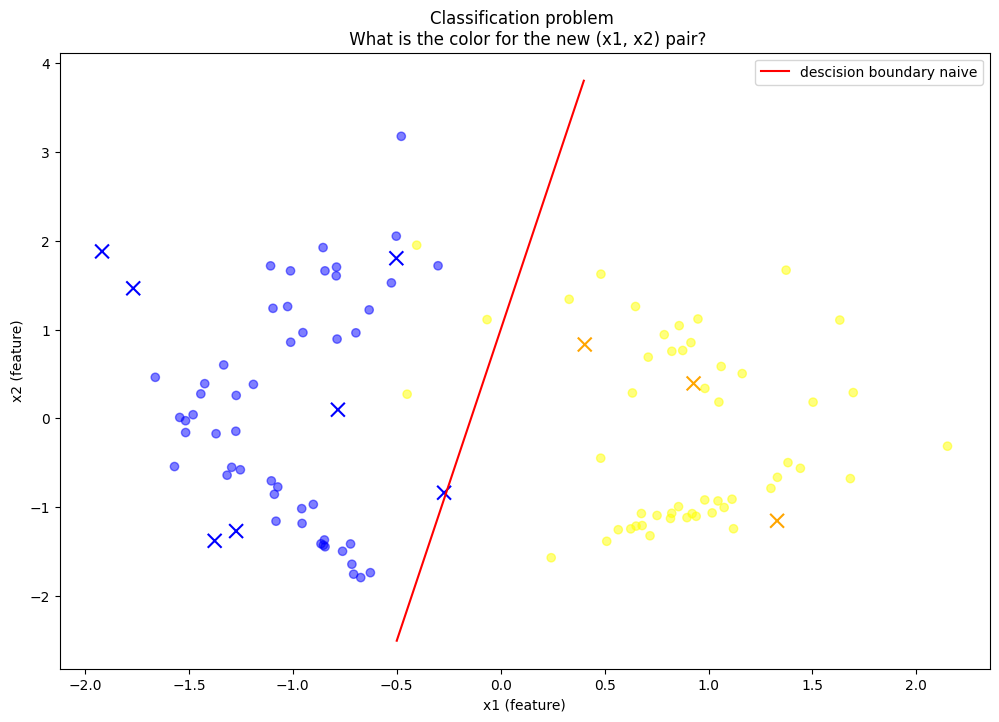

In [8]:
x_naive = np.arange(-0.5, 0.5, 0.1)
# naive boundary
y_naive = 7 * x_naive + 1

plt.scatter(x_pred[:, 0], x_pred[:, 1], c=['orange' if y_i > 0 else 'blue' for y_i in y_pred], marker='x', s=100)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.5)
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend();

## Переформулируем задачу
Теперь вместо класса, определяемого знаком, будем предсказывать вероятность принадлежности классу

$$\hat{p} = \sigma(x\theta) $$

где

$$\sigma(t)=\frac{1}{1 + exp(-t)}$$

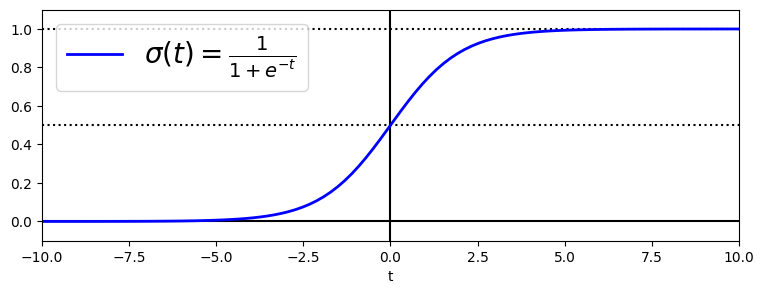

In [9]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Логистическая регрессия в sklearn

к счатью в реальной жизни нам не придется писать код для модели логистической регрессии, ведь в `sklearn` этот алгоритм уже реализован за нас в виде класса `LogisticRegression`.

рассмотрим пример его использования.

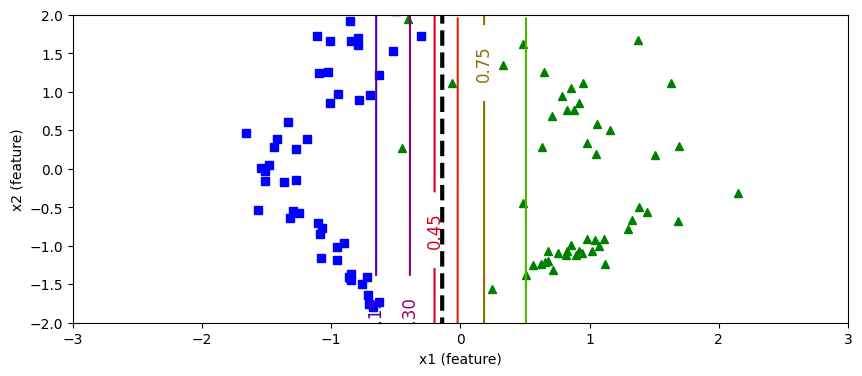

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(-2, 2, 500).reshape(-1, 1),
        np.linspace(-3, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)


plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.axis([-3, 3, -2, 2])
plt.show()

# Пример на реальных даных

Сегодня посмотрим на задачу с [Kaggle](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients#_=_).



Цель задачи: предсказать наличие ортопедических проблем по измерениям костей таза и нижнего позвоночника пациентов.



Сначала загрузим данные с помощью метода `wget`, который позволяет скачивать данные по ссылке на скачивание.

In [14]:
!wget -O column_2C_weka.csv https://drive.usercontent.google.com/download?id=1JGRlocS9FlTpcqRsPVVHJ2fc3Q6vRJbe&export=download&authuser=0&confirm=t&uuid=2c2f5ee8-78f3-4040-b7a5-a7ba35ecb432&at=AO7h07f5JXMog1-8zXdjkYsi71Aq:1727170889921

--2024-09-24 09:45:05--  https://drive.usercontent.google.com/download?id=1JGRlocS9FlTpcqRsPVVHJ2fc3Q6vRJbe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24961 (24K) [application/octet-stream]
Saving to: ‘column_2C_weka.csv’

column_2C_weka.csv  100%[===================>]  24.38K  --.-KB/s    in 0.001s  

2024-09-24 09:45:08 (21.8 MB/s) - ‘column_2C_weka.csv’ saved [24961/24961]



Теперь быстро пройдемся по основным этапам работы с данными.

Загрузка - Статистики и Визуализация - Предобработка - Моделирование

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [18]:
data = pd.read_csv('column_2C_weka.csv')

# перекодируем целевую
data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

In [19]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


Разделим данные на train и test и нормируем.

In [20]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.2, random_state=2, stratify=data['class']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

Обучим логистическую регрессию из библиотеки `sklearn`.

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty=None)

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.855
Precision: 0.887
Recall: 0.898
f1_score: 0.892

Test quality:
Accuracy: 0.823
Precision: 0.857
Recall: 0.878
f1_score: 0.867


Для модели логистической регрессии мы можем оценить важность признаковб которая будет соотвествовать коэффициенту при этом признаке в обученной модели. ажность признаков

In [22]:
log_reg.coef_

array([[-0.1946604 ,  0.97226791, -0.39054164, -0.99148083, -1.25357498,
         6.38528263]])

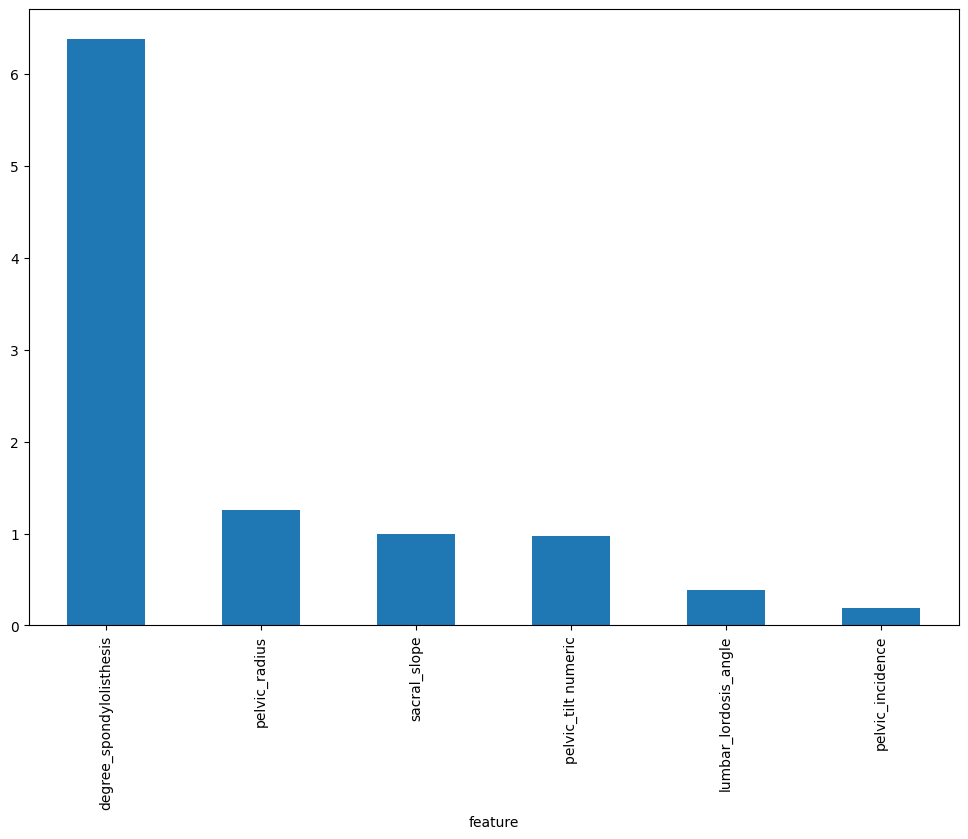

In [23]:
featureImportance = pd.DataFrame({"feature": data.drop('class',axis=1).columns,
                                  "importance": abs(log_reg.coef_[0])})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

### Вероятности

In [24]:
log_reg.predict_proba(X_test_scaled)[:10]

array([[0.31737315, 0.68262685],
       [0.99816255, 0.00183745],
       [0.6438512 , 0.3561488 ],
       [0.55780356, 0.44219644],
       [0.19896849, 0.80103151],
       [0.0758323 , 0.9241677 ],
       [0.01226931, 0.98773069],
       [0.01001511, 0.98998489],
       [0.00157765, 0.99842235],
       [0.22043542, 0.77956458]])

In [25]:
log_reg.predict(X_test_scaled)[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

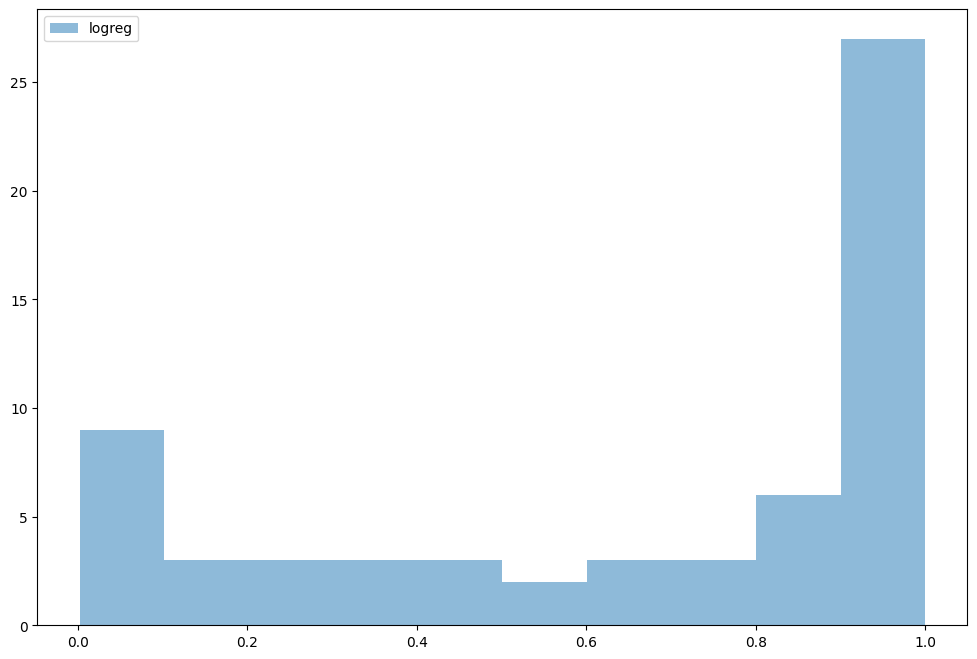

In [26]:
plt.hist(log_reg.predict_proba(X_test_scaled)[:, 1], alpha=0.5, label = 'logreg');
plt.legend();


## ROC_AUC

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC-AUC ', round(roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1]),3))

ROC-AUC  0.948


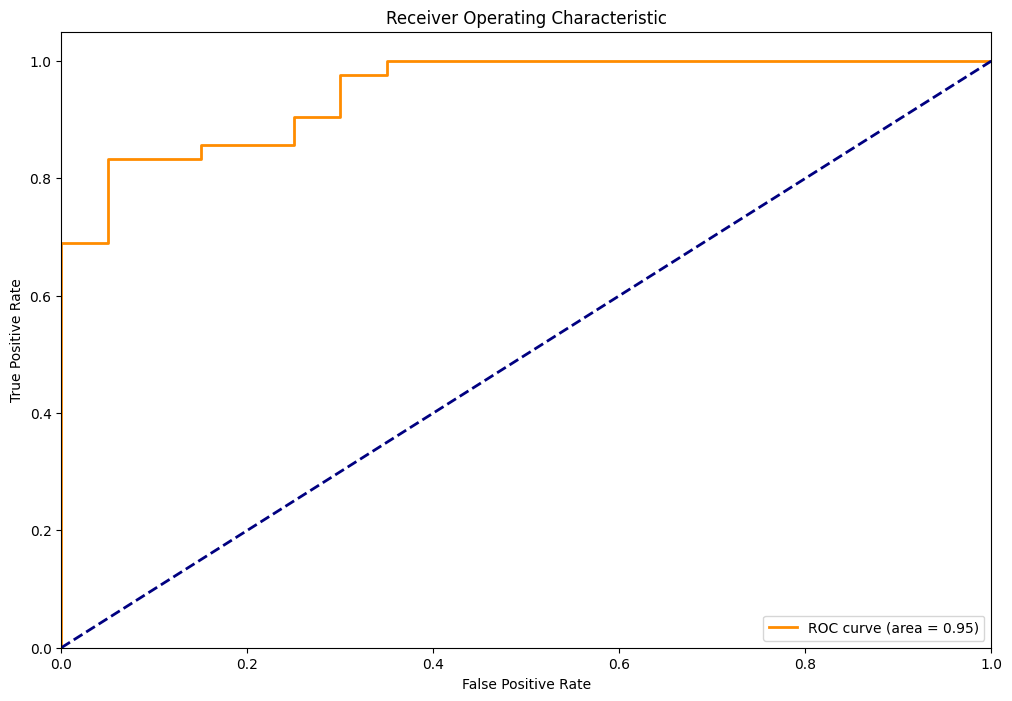

In [28]:
# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1])

# Вычисляем AUC
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Регуляризация


* Добавить дополнительное ограничение на норму вектора весов $R(\omega)$:
$$
LogLoss+\lambda R(\omega)\to\min_{\beta}
$$
* $\lambda>0$ - гиперпараметр.
* $R(\omega)$ штраф за сложность модели.

$$
\begin{array}{ll}
R(\omega)=||\omega||_{1} &  \text{(L1) Lasso regression}\\
R(\omega)=||\omega||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$


### L2 Ridge

In [29]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1]}

log_reg = LogisticRegression(penalty = 'l2')
clf = GridSearchCV(log_reg, parameters, scoring = 'roc_auc', cv = 23)
clf.fit(data.drop(['class'], axis=1), data['class'])

GridSearchCV(cv=23, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, scoring='roc_auc')

In [30]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.931280
1,0.010,0.935870
2,0.100,0.933575
3,1.000,0.933575


In [31]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 0.01} 	 Best score:  0.9358695652173913


### L1 Lasso

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf = GridSearchCV(log_reg, parameters, scoring = 'roc_auc', cv = 23)
clf.fit(data.drop(['class'], axis=1), data['class'])

GridSearchCV(cv=23,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [33]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.867754
1,0.010,0.881884
2,0.100,0.904589
3,1.000,0.925242
4,10.000,0.934783
5,100.000,0.933575


In [34]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 10} 	 Best score:  0.9347826086956522
